<img src="image_and_Video/download.jpg" style="width:680px;height:600px;position:relative;margin-right:270px;"/>

## Total Process from building model to predicting

#### ( Done by Sanjib Kumar Shingha)

#### 1. Importing dependencies

#### 2. Reading dataset

#### 3. Setting the value for dependent and independent variables

#### 4. Checking for missing values

#### 5. Imputation of missing values

#### 6. Exploratory data analysis

#### (Done by Sree Himel Debnath)

#### 7. Model Building

#### 8. Converting some object data type to int

#### 9. Setting the value for dependent and independent variables

#### 10.Splitting the dataset into train and test set

#### 11.Fitting the Logistic regression model

#### 12.Prediction on the test set

#### 13.Evaluating the Model

#### 14.Getting Graphical Representation By Implementing ROC_AUC curve

#### 15.Testing the logistic regression model by giving inputs manually











### Importing dependencies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Importing Logistic Regression model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 

### Reading dataset 

In [2]:
dataset = pd.read_csv("loan_data_set.csv")

In [3]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
dataset.head() # printing first 5 rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Checking for missing values 

In [5]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Imputation of missing values 

In [6]:
dataset['Gender']=dataset['Gender'].fillna(dataset['Gender'].mode().values[0]) #Filling Gender column by mode

In [7]:
dataset['Married']=dataset['Married'].fillna(dataset['Married'].mode().values[0]) # Filling Married column by mode 

In [8]:
dataset['Dependents']=dataset['Dependents'].fillna(dataset['Dependents'].mode().values[0]) # Filling Dependents column by mode

In [9]:
dataset['Self_Employed']=dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode().values[0]) #Filling Self_Employed column by mode

In [10]:
dataset['LoanAmount']=dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean()) #Filling LoanAmount column by mean

In [11]:
dataset['Loan_Amount_Term']=dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode().values[0] ) #Filling Loan_Amount_Term column by mode

In [12]:
dataset['Credit_History']=dataset['Credit_History'].fillna(dataset['Credit_History'].mode().values[0] ) #Filling Credit_History column by mode

In [13]:
dataset.isna().sum() #Checking missing values after imputation

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
# Dropping unnecessary columns
dataset.drop('Loan_ID', axis=1, inplace=True)

In [15]:
dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [16]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Exploratory data analysis 

#### 1.Dataset shape 

In [17]:
# Number of rows and columns of train set
dataset.shape

(614, 12)

#### 2.Dataset info 

In [18]:
# Dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


#### 3.Gender obtaining the maximum number of loans 

<Axes: xlabel='count', ylabel='Gender'>

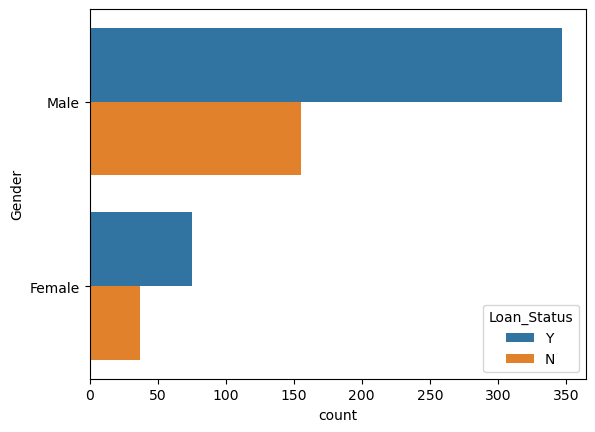

In [19]:
sns.countplot(y = 'Gender', hue = 'Loan_Status', data = dataset)

In [20]:
dataset['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

#### 4.Does marital status affect loan approval? 

Married
Yes    401
No     213
Name: count, dtype: int64

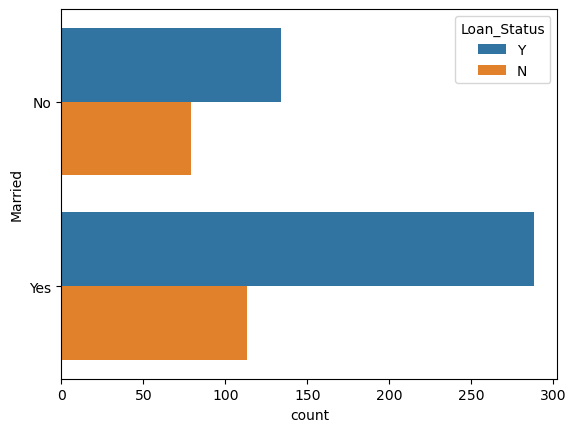

In [21]:
sns.countplot(y= 'Married', hue= 'Loan_Status', data= dataset)
dataset['Married'].value_counts()

#### 5. Does education status affect loan approval? 

<Axes: xlabel='count', ylabel='Education'>

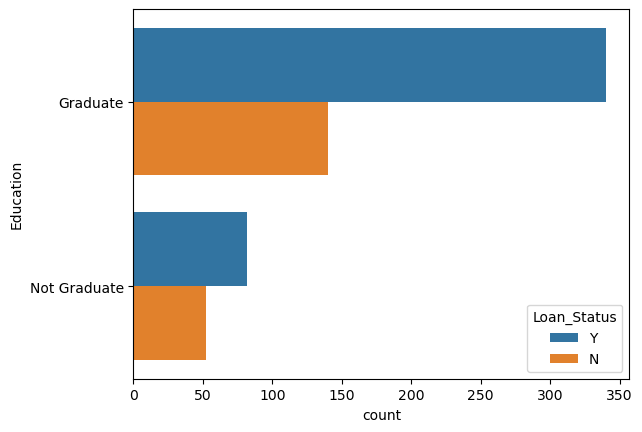

In [22]:
sns.countplot(y = 'Education', hue = 'Loan_Status', data = dataset)

In [23]:
dataset['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

#### 6. Does employment affect loan approval? 

<Axes: xlabel='count', ylabel='Self_Employed'>

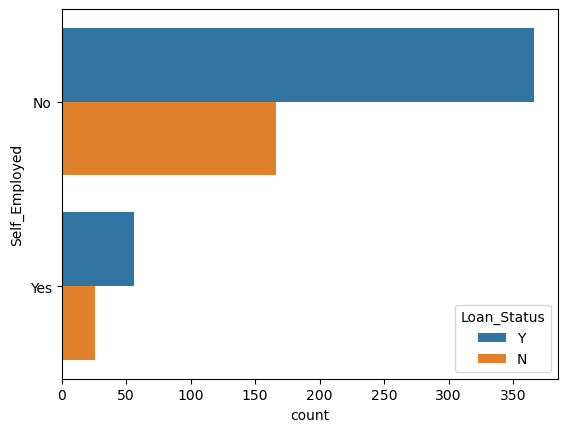

In [24]:
sns.countplot(y= 'Self_Employed', hue= 'Loan_Status', data= dataset)

In [25]:
dataset['Self_Employed'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

#### 7. Does credit history affect loan approval? 

<Axes: xlabel='count', ylabel='Credit_History'>

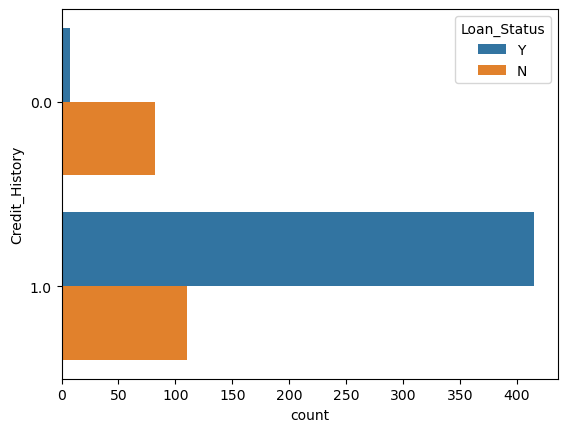

In [26]:
sns.countplot(y= 'Credit_History', hue= 'Loan_Status', data=dataset)

## Model Building 

#### Converting some object data type to int 

In [27]:
gender = {"Female": 0, "Male": 1}
yes_no = {'No' : 0,'Yes' : 1}
dependents = {'0':0,'1':1,'2':2,'3+':3}
education = {'Not Graduate' : 0, 'Graduate' : 1}
property = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}
output = {"N": 0, "Y": 1}

In [28]:
dataset['Gender'] = dataset['Gender'].replace(gender)
dataset['Married'] = dataset['Married'].replace(yes_no)
dataset['Dependents'] = dataset['Dependents'].replace(dependents)
dataset['Education'] = dataset['Education'].replace(education)
dataset['Self_Employed'] = dataset['Self_Employed'].replace(yes_no)
dataset['Property_Area'] = dataset['Property_Area'].replace(property)
dataset['Loan_Status'] = dataset['Loan_Status'].replace(output)

In [29]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


#### Setting the value for dependent and independent variables

In [30]:
# Setting the value for dependent and independent variables
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [31]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1


In [32]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


### Splitting the dataset into train and test set 

In [33]:
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size= 0.25, random_state=38, stratify = y)

In [34]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((460, 11), (460, 1), (154, 11), (154, 1))

### Fitting the Logistic regression model

In [35]:
classifier= LogisticRegression()

In [36]:
Y_train = np.ravel(Y_train)
Y_test = np.ravel(Y_test)

In [37]:
classifier.fit(X_train, Y_train)

LogisticRegression()

### Prediction on the test set 

In [38]:
#Prediction of test set
prediction_classifier = classifier.predict(X_test)

In [39]:
# Print the predicted values
print("Prediction for test set: {}".format(prediction_classifier))

Prediction for test set: [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [40]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': Y_test, 'Predicted value': prediction_classifier})


In [41]:
a.head()

,Actual value,Predicted value
0,1,1
1,1,1
2,0,1
3,1,1
4,1,1


### Evaluating the Model 

              precision    recall  f1-score   support

           0       0.89      0.33      0.48        48
           1       0.76      0.98      0.86       106

    accuracy                           0.78       154
   macro avg       0.83      0.66      0.67       154
weighted avg       0.80      0.78      0.74       154



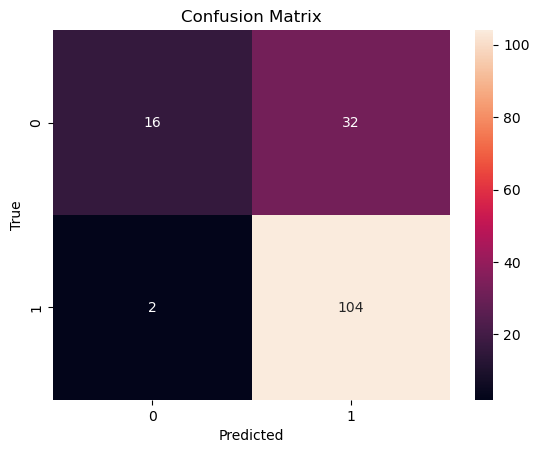

In [42]:
matrix = confusion_matrix(Y_test, prediction_classifier) # Confusion matrix and classification report
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(Y_test, prediction_classifier))

### Getting Graphical Representation By Implementing ROC_AUC curve

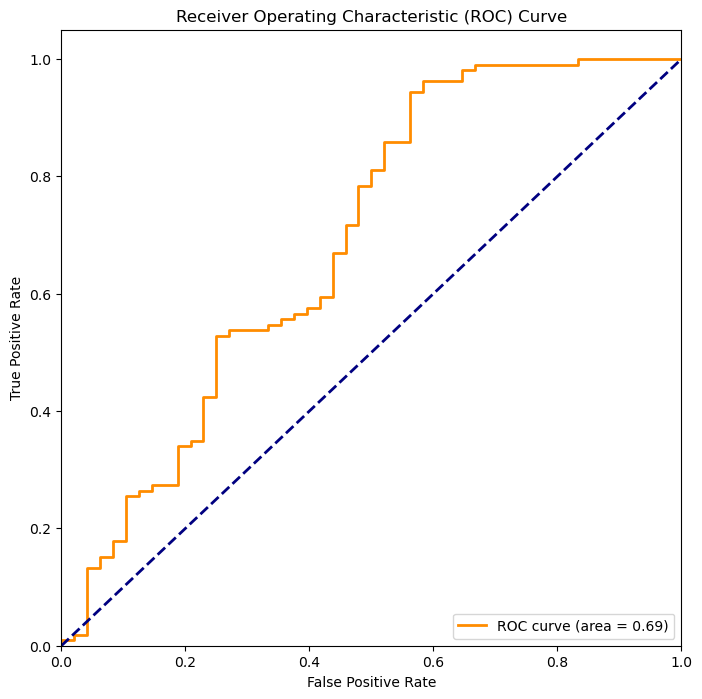

In [43]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_probs = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Testing the logistic regression model by giving inputs manually 

In [44]:

# Testing the logistic regression model by giving inputs manually
input_data = (1, 0, 3, 1, 1, 1, 4583, 1508, 128, 360, 1)  # Replace this with your input values

# Converting the input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the input data
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Making predictions using the logistic regression model
prediction = classifier.predict(input_data_reshaped)

# Printing the prediction result
if prediction[0] == 0:
    print('The person is not eligible for a loan.')
else:
    print('The person is eligible for a loan.')


The person is eligible for a loan.


C:\Users\COMPUTER WORLD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
